## Lesson 03: Exploratory Analysis


## Contents

* [Getting Started](#Getting-Started)
* [Loading, Merging, and Cleaning Similar Data](#Loading,-Merging,-and-Cleaning-Similar-Data)
    * [Loading a CSV: Franklin County Audit Data](#Loading-a-CSV:-Franklin-County-Audit-Data)
    * [Parsing Errors: Licking County Auditor Data](#Parsing-Errors:-Licking-County-Auditor-Data)
    * [Extraction from a GIS Dataset: Fairfield County Auditor Data](#Extraction-from-a-GIS-Dataset:-Fairfield-County-Auditor-Data)
* [Joining Related Datasets](#Joining-Related-Datasets)
* [Lab Answers](#Lab-Answers)
* [Next Steps](#Next-Steps)
* [Resources and Further Reading](#Resources-and-Further-Reading)
* [Exercises](#Exercises)

### Lab Questions

[1](#Lab-1), [2](#Lab-2), [3](#Lab-3), [4](#Lab-4), [5](#Lab-5), [6](#Lab-6), [7](#Lab-7), [8](#Lab-8), [9](#Lab-9),  [10](#Lab-10), [11](#Lab-11), [12](#Lab-12), [13](#Lab-13), [14](#Lab-14), [15](#Lab-15)

## Getting Started

With some data loaded and cleaned, we can begin to look at it more closely and see if we can identify any trends or relationships.  To do this, we can rely on both qantatative methods such as the calculation and analysis of descriptive statistics as well as qualatative methods such as plotting. We'll rely on methods in pandas to calculate descriptive statistics. We'll rely on [Matplotlib](https://matplotlib.org/) and [Seaborn] for plotting(https://seaborn.pydata.org/). Matplotlib is a popular plotting library capable of producing [many different types of plots](https://matplotlib.org/gallery/index.html). Seaborn provides a simpler way of creating many of the plots commonly associated with data analysis and typically produces [nicer looking plots](https://seaborn.pydata.org/examples/index.html).

To use Seaborn, we'll make sure it is installed with `pip`.

In [1]:
!pip install seaborn

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


We'll be creating plots in this notebook.  Before importing any modules, we should indicate to the notebook software how we would like to handle plots.  We can use the [`%matplotlib`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) magic command and `inline` to indicate that we would like plot to appear as static images in the notebook.

In [2]:
%matplotlib inline

With Seaborn installed, we can start importing modules for use in the notebook. Just as we followed convention and imported pandas as `pd`, we will import the Seaborn library as `sns`.  

Following the import, we can set the appropriate pandas option to display 100 columns at a time. We can use the Searborn `set()` function to control figure size and the size of marker edges. Setting marker edges allows us to see outliers when working with box plots that would otherwise be invisible due to a bug in Matplotlib and Seaborn. 

In [3]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize': (12, 10), "lines.markeredgewidth": 0.5 })

## Exploring a Dataset

Let's start with the EPA/Department of Energy fuel economy dataset set we looked at last time.  Often data cleaning, merging, and exploration are done together - data is cleaned as we examine it for relationships and trends and then the pertinent/interesting data is merged and stored for further analysis.  Though we cleaned and merged the fuel economy and vehicle sales data previously, lets start with the original datasets for this initial exploration.  

We can load the data from the `./data/02-vehicles.csv` file using pandas' `read_csv()` function.

In [4]:
epa_data = pd.read_csv("./data/02-vehicles.csv", engine="python")
epa_data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


We also have a summarized data description document for this data, we can display it with the `HTML` function in the `IPython.display` module.

In [5]:
from IPython.display import HTML
HTML(filename="./data/02-vehicles-description.html")

As part of our initial exploration, we'll attempt to catalog/categorize the values in the following columns and see if there are any relationships between pairs of them.

- `city08`
- `city08U`
- `co2`
- `c02TailpipeGpm`
- `comb08`
- `comb08U`
- `cylinders`
- `displ`
- `fuelType1`
- `highway08`
- `highway08U`
- `year`
- `VClass`

We'll also keep the following fields for each row.  

- `make`
- `model`

<hr>
<a name="Lab-01"></a><mark> **Lab 01** In the cell below, create a copy of the `epa_data` DataFrame containing only the columns listed above.  Store the new DataFrame in a variable named `epa_subset`.  Use the *head()* method to confirm that the new DataFrame contains the correct column data.
</mark>

In [6]:
columns = ["city08", "city08U", "co2", "co2TailpipeGpm", "comb08", "comb08U", 
           "cylinders", "displ", "fuelType1", "highway08", "highway08U", 
           "make", "model", "VClass", "year"]
epa_subset = epa_data[columns].copy()
epa_subset.head()

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,VClass,year
0,19,0.0,-1,423.190476,21,0.0,4.0,2.0,Regular Gasoline,25,0.0,Alfa Romeo,Spider Veloce 2000,Two Seaters,1985
1,9,0.0,-1,807.909091,11,0.0,12.0,4.9,Regular Gasoline,14,0.0,Ferrari,Testarossa,Two Seaters,1985
2,23,0.0,-1,329.148148,27,0.0,4.0,2.2,Regular Gasoline,33,0.0,Dodge,Charger,Subcompact Cars,1985
3,10,0.0,-1,807.909091,11,0.0,8.0,5.2,Regular Gasoline,12,0.0,Dodge,B150/B250 Wagon 2WD,Vans,1985
4,17,0.0,-1,467.736842,19,0.0,4.0,2.2,Premium Gasoline,23,0.0,Subaru,Legacy AWD Turbo,Compact Cars,1993


<hr>

As we've seen before, we can use the DataFrame *describe()* method to quickly calculate some discriptive statistics for each of the numeric columns in the dataframe.

In [7]:
epa_subset.describe()

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,highway08,highway08U,year
count,39518.000000,39518.000000,39518.000000,39518.000000,39518.000000,39518.000000,39353.000000,39355.000000,39518.000000,39518.000000,39518.000000
mean,18.160787,5.261330,75.711549,469.675894,20.405790,5.889232,5.726069,3.306223,24.289134,6.977922,2000.816716
std,7.307656,10.842512,165.824216,122.861548,7.167849,11.573437,1.755260,1.360637,7.346104,13.116489,10.778162
min,6.000000,0.000000,-1.000000,0.000000,7.000000,0.000000,2.000000,0.000000,9.000000,0.000000,1984.000000
25%,15.000000,0.000000,-1.000000,386.391304,17.000000,0.000000,4.000000,2.200000,20.000000,0.000000,1991.000000
50%,17.000000,0.000000,-1.000000,454.000000,20.000000,0.000000,6.000000,3.000000,24.000000,0.000000,2002.000000
75%,20.000000,0.000000,-1.000000,535.000000,23.000000,0.000000,6.000000,4.300000,28.000000,0.000000,2010.000000
max,150.000000,150.000000,847.000000,1269.571429,136.000000,136.000000,16.000000,8.400000,123.000000,123.340000,2019.000000


Let's look at one column to get an idea of what these values represent. According to the documentation, the `city08` column represnts the fuel economy for city driving with the primary fuel type.  The rows have the following meaning.

- `count`: the number of non-null elements in the column; here there are 39,518 non-null values in the `city08` column
- `mean`: the sum of all values divided by the number of values; the mean value for `city08` is 18.2 mpg.
- `std`: the standard deviation - a measure of the variation of values within a collection, can be thought of as an "average" distance to the mean among all the values; the standard deviation of values in the `city08` column is 7.3 mpg.
- `min` and `max`: the smallest and largest values, respectively; here we have 6.0 mpg and 150.0 mpg. 
- `25%`, `50%`, and `75%`: the quartile values that allow us to divide the data into four parts. The first quartile, 25%, corresponds to the value between the minimum and the median; 25% of values are less than this value.  The second quartile is the median, the middle most number among the values; 50% of values are less than the median and 50% of values are greater than the median. The third quartile represents the middle value between the median and the maximum; 25% of values are greater than this value. 

As we noted previously, *describe()* only display results for numeric columns.  For non-numeric columns, we might be interested in knowing about the data values and how often those values appear.  Below, we iterate through the columns of the DataFrame and if the the column is a string data we display the column name with the output from the *value_counts()* method.

In [8]:
for column in epa_subset.columns:
    if pd.api.types.is_string_dtype(epa_subset[column]):
        display(column, epa_subset[column].value_counts())


'fuelType1'

Regular Gasoline     27134
Premium Gasoline     10950
Diesel                1118
Electricity            162
Midgrade Gasoline       94
Natural Gas             60
Name: fuelType1, dtype: int64

'make'

Chevrolet                             3905
Ford                                  3260
Dodge                                 2559
GMC                                   2442
Toyota                                1994
BMW                                   1819
Mercedes-Benz                         1433
Nissan                                1420
Volkswagen                            1149
Mitsubishi                            1044
Mazda                                  980
Audi                                   965
Porsche                                962
Honda                                  951
Pontiac                                893
Jeep                                   890
Subaru                                 860
Volvo                                  786
Chrysler                               718
Hyundai                                710
Buick                                  647
Mercury                                609
Cadillac                               555
Kia        

'model'

F150 Pickup 2WD                 214
F150 Pickup 4WD                 192
Jetta                           190
Mustang                         188
Truck 2WD                       187
Camaro                          174
Ranger Pickup 2WD               169
Accord                          152
Civic                           152
Sierra 1500 4WD                 149
Sierra 1500 2WD                 149
Eclipse                         133
Corolla                         126
Camry                           125
Sentra                          124
S10 Pickup 2WD                  118
Ranger Pickup 4WD               113
Truck 4WD                       113
D100/D150 Pickup 2WD            112
Dakota Pickup 2WD               108
Colt                            107
F250 Pickup 2WD                 106
C1500 Pickup 2WD                106
E150 Econoline 2WD              105
Cavalier                        101
Corvette                        101
K1500 Pickup 4WD                101
Lancer                      

'VClass'

Compact Cars                          5689
Subcompact Cars                       5002
Midsize Cars                          4619
Standard Pickup Trucks                2354
Sport Utility Vehicle - 4WD           2082
Large Cars                            2028
Two Seaters                           1974
Sport Utility Vehicle - 2WD           1627
Small Station Wagons                  1559
Special Purpose Vehicles              1455
Minicompact Cars                      1311
Standard Pickup Trucks 2WD            1213
Vans                                  1141
Standard Pickup Trucks 4WD            1027
Small Sport Utility Vehicle 4WD        669
Midsize-Large Station Wagons           656
Special Purpose Vehicle 2WD            635
Small Pickup Trucks                    538
Standard Sport Utility Vehicle 4WD     537
Midsize Station Wagons                 531
Small Sport Utility Vehicle 2WD        494
Small Pickup Trucks 2WD                452
Vans, Cargo Type                       438
Minivan - 2

While having access to these results can be useful, we often rely on visualizations to help characterize data or provide insights into potential relationships.  Before generating visualizations, let's address some data quality issues.  First, we can remove duplicates. 

<hr>
<a name="Lab-02"></a><mark> **Lab 02** In the cell below, remove duplicate rows from the `epa_subset` DataFrame.
</mark>

In [9]:
epa_subset.drop_duplicates(inplace=True)

<hr>

We'll also need to account for missing data - while some methods we'll use to explore the data are able to ignore missing values, other will fail and throw exceptions.

From the code below we can see that the `cylinders` and `displ` columns are missing data.

In [10]:
epa_subset.isna().sum()

city08              0
city08U             0
co2                 0
co2TailpipeGpm      0
comb08              0
comb08U             0
cylinders         165
displ             163
fuelType1           0
highway08           0
highway08U          0
make                0
model               0
VClass              0
year                0
dtype: int64

Let's see if we can identify any common properties for rows missing `cylinders` or `displ` data.  We can filter the DataFrame using a mask that corresponds to a row in which any column value is missing.

In [11]:
#nan
epa_subset[epa_subset.isna().any(axis=1)].head()

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,VClass,year
7138,81,0.0,0,0.0,85,0.0,NaN,NaN,Electricity,91,0.0,Nissan,Altra EV,Midsize Station Wagons,2000
7139,81,0.0,0,0.0,72,0.0,NaN,NaN,Electricity,64,0.0,Toyota,RAV4 EV,Sport Utility Vehicle - 2WD,2000
8143,81,0.0,0,0.0,72,0.0,NaN,NaN,Electricity,64,0.0,Toyota,RAV4 EV,Sport Utility Vehicle - 2WD,2001
8144,74,0.0,0,0.0,65,0.0,NaN,NaN,Electricity,58,0.0,Ford,Th!nk,Two Seaters,2001
8146,45,0.0,0,0.0,39,0.0,NaN,NaN,Electricity,33,0.0,Ford,Explorer USPS Electric,Sport Utility Vehicle - 2WD,2001


It looks like the rows with missing cylinder and displacement data correspond to electric vehicles.  This makes sense given the fact that electric vehicles do no have an internal combustion engine.  Let's refine the mask to exclude rows where `fuelType` is `Electricity`.

In [12]:
epa_subset[(epa_subset.isna().any(axis=1)) & (epa_subset.fuelType1 != 'Electricity')].head()

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,VClass,year
21409,22,0.0,-1,370.291667,24,0.0,NaN,NaN,Regular Gasoline,28,0.0,Subaru,RX Turbo,Subcompact Cars,1985
21410,21,0.0,-1,386.391304,23,0.0,NaN,NaN,Regular Gasoline,27,0.0,Subaru,RX Turbo,Subcompact Cars,1985
21502,15,0.0,-1,493.722222,18,0.0,NaN,1.3,Regular Gasoline,22,0.0,Mazda,RX-7,Two Seaters,1986


It appears that these rows are anomalies and are simply missing data.

Before continuing on, we'll remove rows with missing data.

In [13]:
epa_subset.dropna(inplace=True)

To begin getting a higher-level picture of our data, we can use visualizations.  While we have some sense of the distribution of data values from the quartile information calculated by the *describe()* method, a [histograms](https://en.wikipedia.org/wiki/Histogram) can be used to visualize the date distribution.  

Both pandas DataFrames and Series have *hist()* methods that can be used to plot histograms. This allows us to create a histogram for a specific column or for each column in a DataFrame with numeric values. 

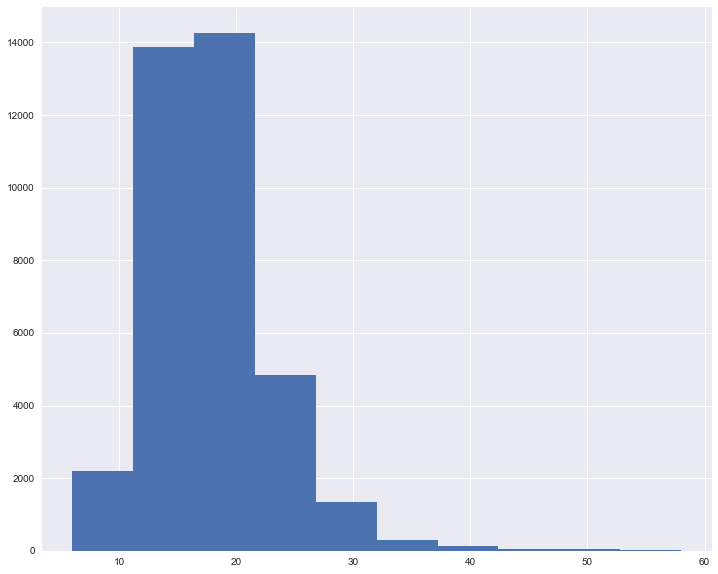

In [14]:
epa_subset.city08.hist()

The *hist()* method returns an `AxesSubplot` object that can be used to manipulate the plot - this is what the text above the plot refers to - we can ignore this now.

From the plot we can see that most of the values are concentrated between 10 and 30 mpg.  We can also see that the distribution has a positive [skew](https://en.wikipedia.org/wiki/Skewness).  We can confirm this using the column's `skew()` method.  Similarly, we can calculate the [kurtosis](https://en.wikipedia.org/wiki/Kurtosis) using the *kurtosis()* method.

<hr>
<a name="Lab-03"></a><mark> **Lab 03** Calculate and display the skew and kurtosis of the data in the `city08` column.
</mark>


In [15]:
display(epa_subset.city08.skew())
display(epa_subset.city08.kurtosis())

1.488601172240319

5.280570889879309

<hr>

The pandas *hist()* method relies on Matplotlib and Seaborn to generate the plot. We can generate a histogram directly from Seaborn if we'd like. To do this, we can use the [*distplot()*](https://seaborn.pydata.org/generated/seaborn.distplot.html) function.  By default, the function generates a plot representing the probability distribution of observations rather than the count of values.  To generate a plot based on the count, we have to provide the `kde=False` argument. We can also specify `bins=10` for consistency with the previous plot.

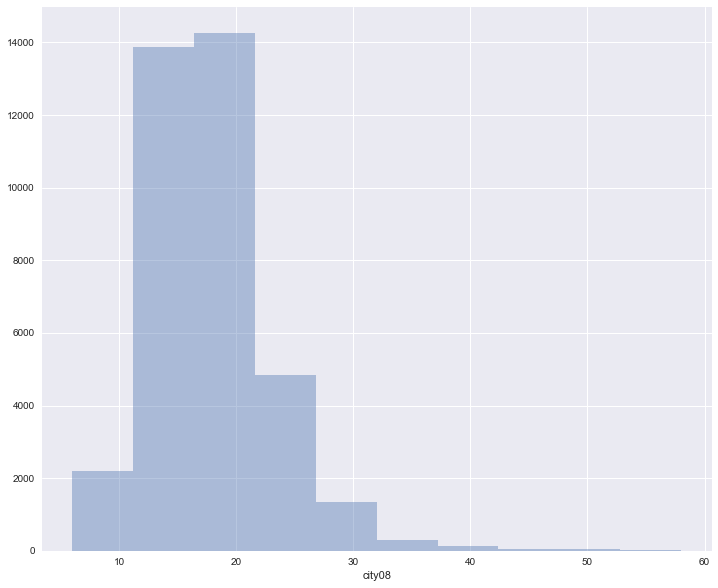

In [21]:
sns.distplot(epa_subset.city08, kde=False, bins=10)

To generate the histograms for each of the numeric columns in the DataFrame, we can use the DataFrame's *hist()* method rather than the Series *hist()* method associated with an individual column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11255a278>,
      dtype=object)

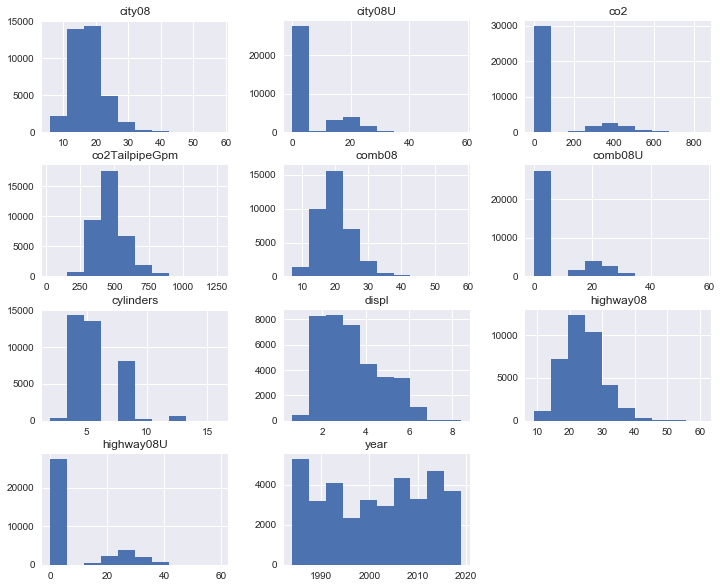

In [22]:
epa_subset.hist()

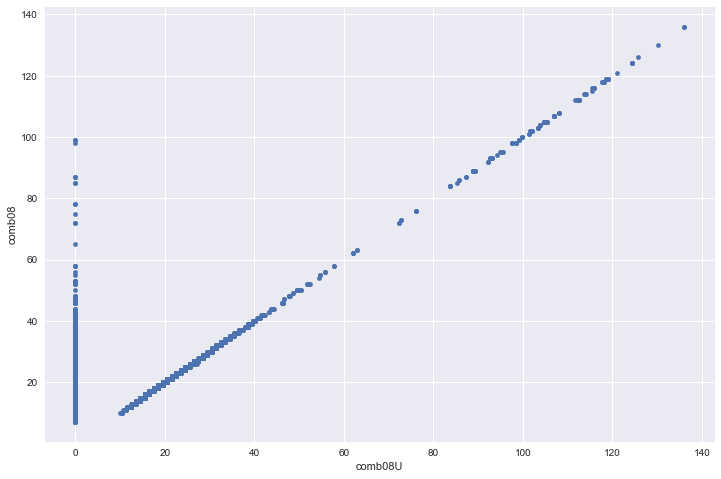

In [38]:
# difference between comb08U and comb08
epa_subset.plot.scatter(x="comb08U", y="comb08")

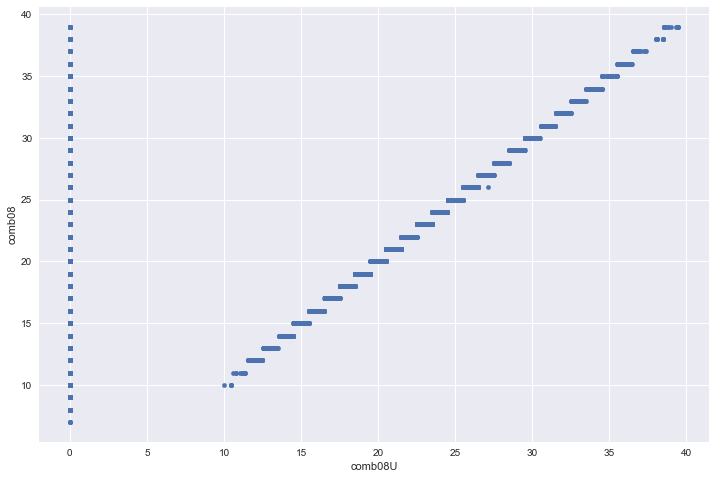

In [39]:
# rounding
epa_subset.query("comb08 > 0 and comb08 < 40").plot.scatter(x="comb08U", y="comb08")

In [40]:
# documentation indicates unrounded values not available for some vehicles
for column in ["city08", "city08U", "comb08", "comb08U", "highway08", "highway08U"]:
    non_zeros = epa_subset[epa_subset[column] > 0.01]
    display(column, len(non_zeros))

'city08'

37212

'city08U'

9693

'comb08'

37212

'comb08U'

9693

'highway08'

37212

'highway08U'

9693

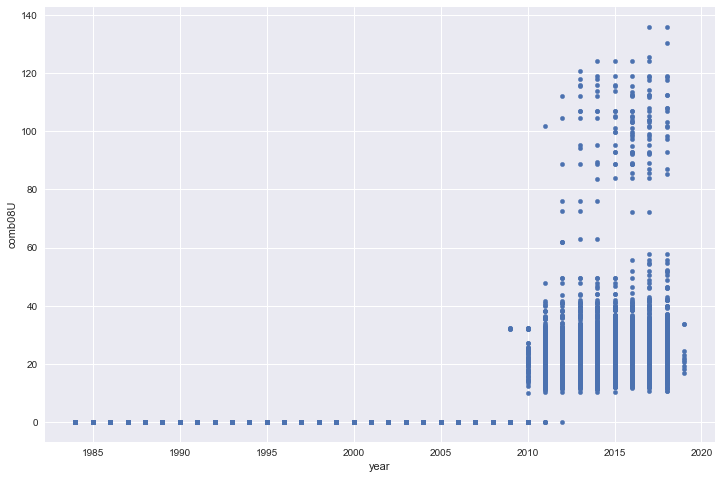

In [41]:
epa_subset.plot.scatter(x="year", y="comb08U")

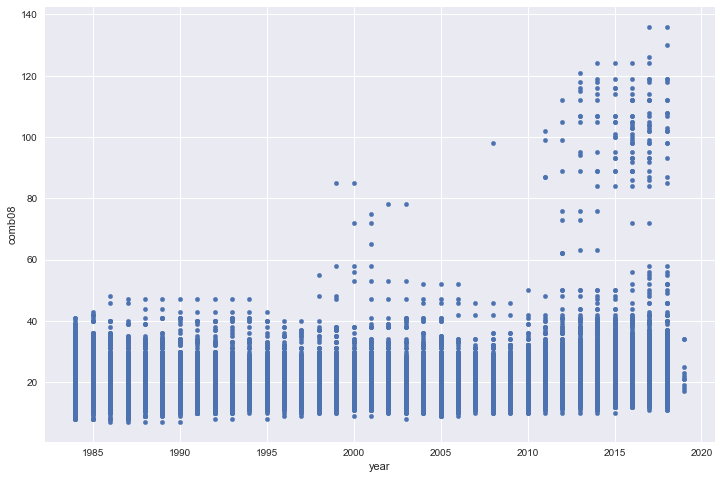

In [42]:
epa_subset.plot.scatter(x="year", y="comb08")

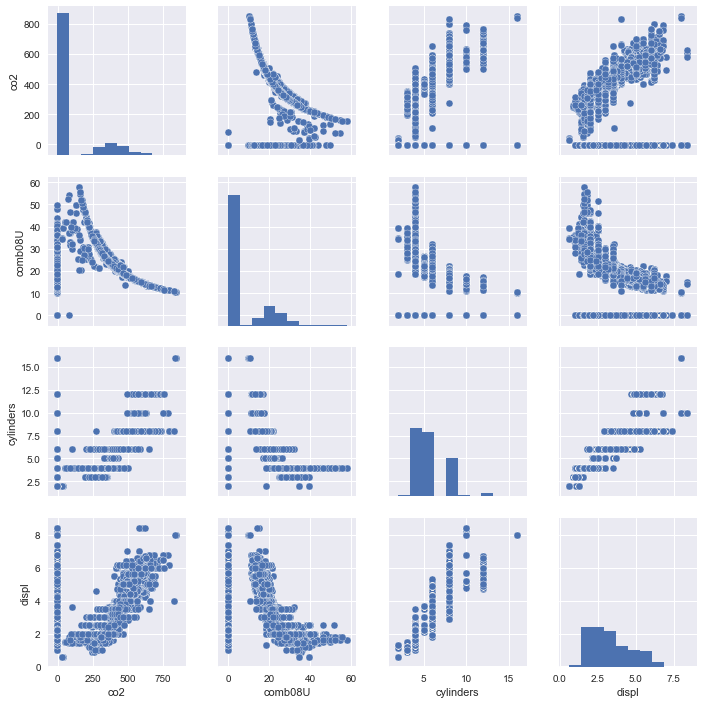

In [43]:
columns = [ "co2", "comb08U", "cylinders", "displ"]
sns.pairplot(epa_subset[columns].dropna())

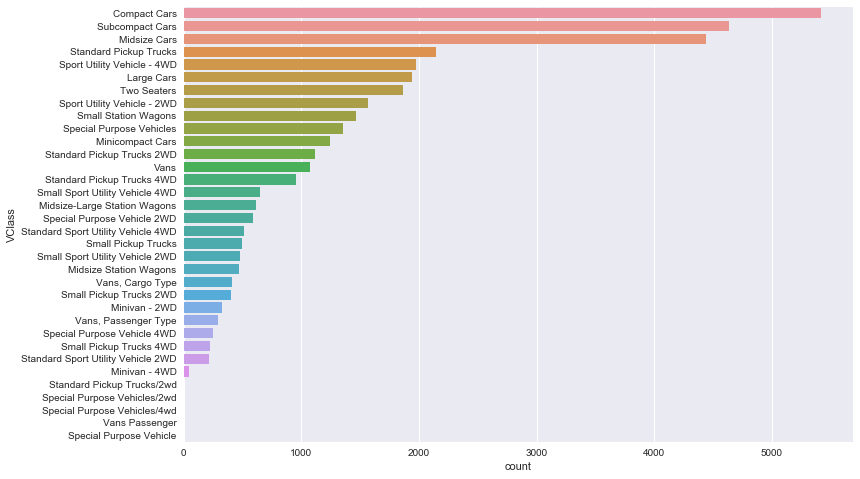

In [44]:
sns.countplot(y="VClass", data=epa_subset, order=epa_subset.VClass.value_counts().index)

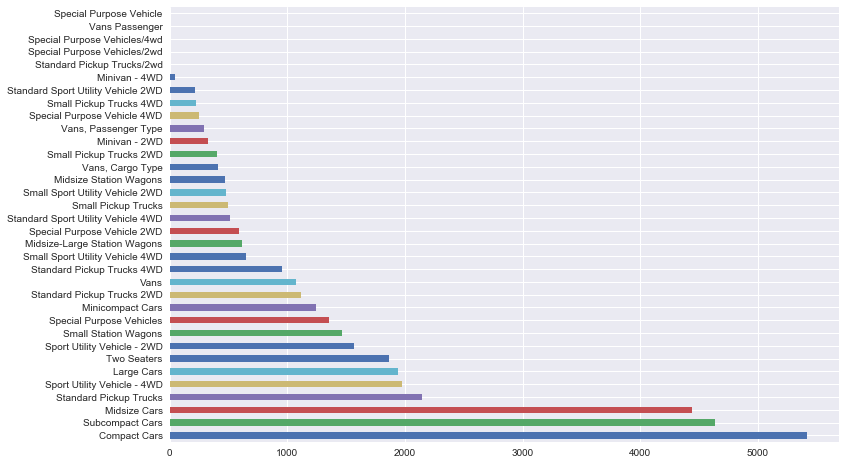

In [45]:
epa_subset.VClass.value_counts().plot(kind="barh")

In [46]:
top_classes = epa_subset.VClass.value_counts().index[:3]

In [47]:
epa_top_classes = epa_subset[epa_subset.VClass.isin(top_classes)]
epa_top_classes.head()

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,VClass,year
2,23,0.0,-1,329.148148,27,0.0,4.0,2.2,Regular Gasoline,33,0.0,Dodge,Charger,Subcompact Cars,1985
4,17,0.0,-1,467.736842,19,0.0,4.0,2.2,Premium Gasoline,23,0.0,Subaru,Legacy AWD Turbo,Compact Cars,1993
5,21,0.0,-1,403.954545,22,0.0,4.0,1.8,Regular Gasoline,24,0.0,Subaru,Loyale,Compact Cars,1993
6,22,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,29,0.0,Subaru,Loyale,Compact Cars,1993
7,23,0.0,-1,370.291667,24,0.0,4.0,1.6,Regular Gasoline,26,0.0,Toyota,Corolla,Compact Cars,1993


In [48]:
# masking vs querying: https://pandas.pydata.org/pandas-docs/stable/indexing.html#performance-of-query
epa_top_classes = epa_subset.query("VClass in @top_classes")
epa_top_classes.head()

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,VClass,year
2,23,0.0,-1,329.148148,27,0.0,4.0,2.2,Regular Gasoline,33,0.0,Dodge,Charger,Subcompact Cars,1985
4,17,0.0,-1,467.736842,19,0.0,4.0,2.2,Premium Gasoline,23,0.0,Subaru,Legacy AWD Turbo,Compact Cars,1993
5,21,0.0,-1,403.954545,22,0.0,4.0,1.8,Regular Gasoline,24,0.0,Subaru,Loyale,Compact Cars,1993
6,22,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,29,0.0,Subaru,Loyale,Compact Cars,1993
7,23,0.0,-1,370.291667,24,0.0,4.0,1.6,Regular Gasoline,26,0.0,Toyota,Corolla,Compact Cars,1993


In [49]:
%timeit epa_subset[epa_subset.VClass.isin(top_classes)]

2.47 ms ± 97.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [50]:
%timeit epa_subset.query("VClass in @top_classes")

3.26 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


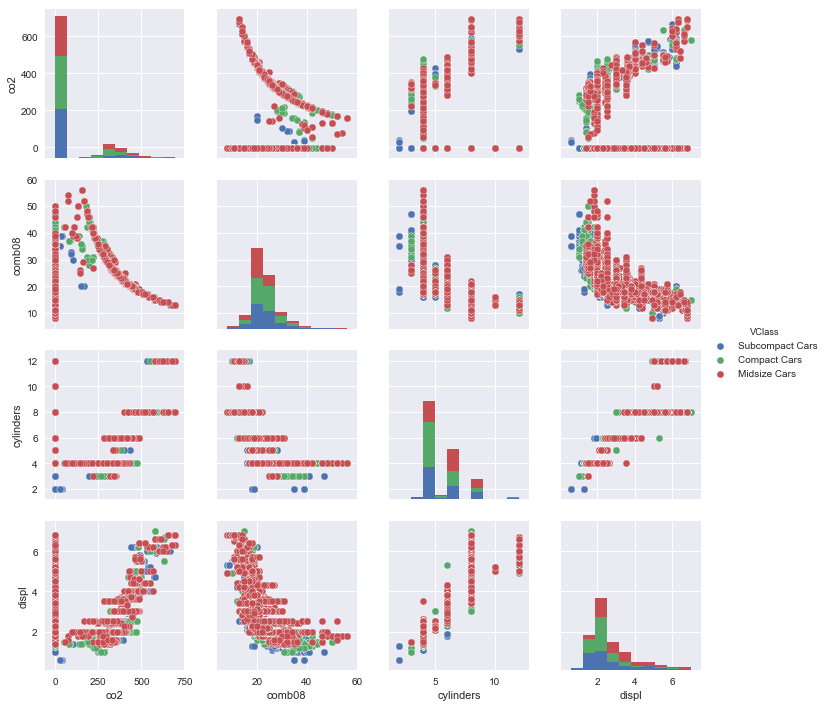

In [51]:
columns = [ "co2", "comb08", "cylinders", "displ", "VClass"]
sns.pairplot(epa_top_classes[columns].dropna(), hue="VClass")

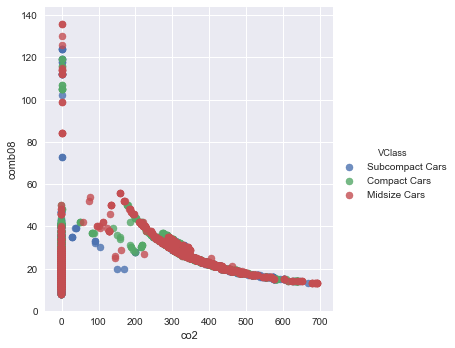

In [52]:
sns.lmplot(x='co2', y="comb08", hue='VClass', data=epa_top_classes, fit_reg=False)

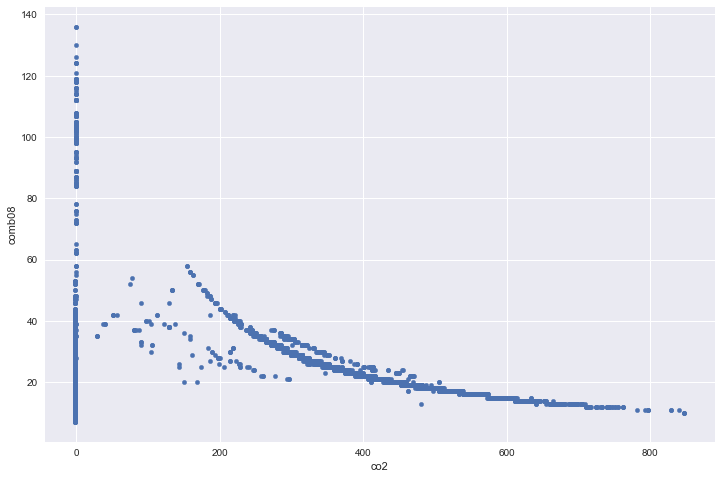

In [53]:
epa_subset.plot.scatter(x='co2', y='comb08')

In [54]:
# comparisons with zero
epa_subset.query("co2 < 0.01")

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,VClass,year
0,19,0.0,-1,423.190476,21,0.0,4.0,2.0,Regular Gasoline,25,0.0,Alfa Romeo,Spider Veloce 2000,Two Seaters,1985
1,9,0.0,-1,807.909091,11,0.0,12.0,4.9,Regular Gasoline,14,0.0,Ferrari,Testarossa,Two Seaters,1985
2,23,0.0,-1,329.148148,27,0.0,4.0,2.2,Regular Gasoline,33,0.0,Dodge,Charger,Subcompact Cars,1985
3,10,0.0,-1,807.909091,11,0.0,8.0,5.2,Regular Gasoline,12,0.0,Dodge,B150/B250 Wagon 2WD,Vans,1985
4,17,0.0,-1,467.736842,19,0.0,4.0,2.2,Premium Gasoline,23,0.0,Subaru,Legacy AWD Turbo,Compact Cars,1993
5,21,0.0,-1,403.954545,22,0.0,4.0,1.8,Regular Gasoline,24,0.0,Subaru,Loyale,Compact Cars,1993
6,22,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,29,0.0,Subaru,Loyale,Compact Cars,1993
7,23,0.0,-1,370.291667,24,0.0,4.0,1.6,Regular Gasoline,26,0.0,Toyota,Corolla,Compact Cars,1993
8,23,0.0,-1,341.807692,26,0.0,4.0,1.6,Regular Gasoline,31,0.0,Toyota,Corolla,Compact Cars,1993
9,23,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,30,0.0,Toyota,Corolla,Compact Cars,1993


In [55]:
epa_subset.query("co2 <= 0.01 and fuelType1 != 'Electricity'")

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,VClass,year
0,19,0.0,-1,423.190476,21,0.0,4.0,2.0,Regular Gasoline,25,0.0,Alfa Romeo,Spider Veloce 2000,Two Seaters,1985
1,9,0.0,-1,807.909091,11,0.0,12.0,4.9,Regular Gasoline,14,0.0,Ferrari,Testarossa,Two Seaters,1985
2,23,0.0,-1,329.148148,27,0.0,4.0,2.2,Regular Gasoline,33,0.0,Dodge,Charger,Subcompact Cars,1985
3,10,0.0,-1,807.909091,11,0.0,8.0,5.2,Regular Gasoline,12,0.0,Dodge,B150/B250 Wagon 2WD,Vans,1985
4,17,0.0,-1,467.736842,19,0.0,4.0,2.2,Premium Gasoline,23,0.0,Subaru,Legacy AWD Turbo,Compact Cars,1993
5,21,0.0,-1,403.954545,22,0.0,4.0,1.8,Regular Gasoline,24,0.0,Subaru,Loyale,Compact Cars,1993
6,22,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,29,0.0,Subaru,Loyale,Compact Cars,1993
7,23,0.0,-1,370.291667,24,0.0,4.0,1.6,Regular Gasoline,26,0.0,Toyota,Corolla,Compact Cars,1993
8,23,0.0,-1,341.807692,26,0.0,4.0,1.6,Regular Gasoline,31,0.0,Toyota,Corolla,Compact Cars,1993
9,23,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,30,0.0,Toyota,Corolla,Compact Cars,1993


In [56]:
# pure python approaach
epa_subset[(epa_subset['co2'] < 0.01) & (epa_subset['fuelType1'] != 'Electricity')]

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,VClass,year
0,19,0.0,-1,423.190476,21,0.0,4.0,2.0,Regular Gasoline,25,0.0,Alfa Romeo,Spider Veloce 2000,Two Seaters,1985
1,9,0.0,-1,807.909091,11,0.0,12.0,4.9,Regular Gasoline,14,0.0,Ferrari,Testarossa,Two Seaters,1985
2,23,0.0,-1,329.148148,27,0.0,4.0,2.2,Regular Gasoline,33,0.0,Dodge,Charger,Subcompact Cars,1985
3,10,0.0,-1,807.909091,11,0.0,8.0,5.2,Regular Gasoline,12,0.0,Dodge,B150/B250 Wagon 2WD,Vans,1985
4,17,0.0,-1,467.736842,19,0.0,4.0,2.2,Premium Gasoline,23,0.0,Subaru,Legacy AWD Turbo,Compact Cars,1993
5,21,0.0,-1,403.954545,22,0.0,4.0,1.8,Regular Gasoline,24,0.0,Subaru,Loyale,Compact Cars,1993
6,22,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,29,0.0,Subaru,Loyale,Compact Cars,1993
7,23,0.0,-1,370.291667,24,0.0,4.0,1.6,Regular Gasoline,26,0.0,Toyota,Corolla,Compact Cars,1993
8,23,0.0,-1,341.807692,26,0.0,4.0,1.6,Regular Gasoline,31,0.0,Toyota,Corolla,Compact Cars,1993
9,23,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,30,0.0,Toyota,Corolla,Compact Cars,1993


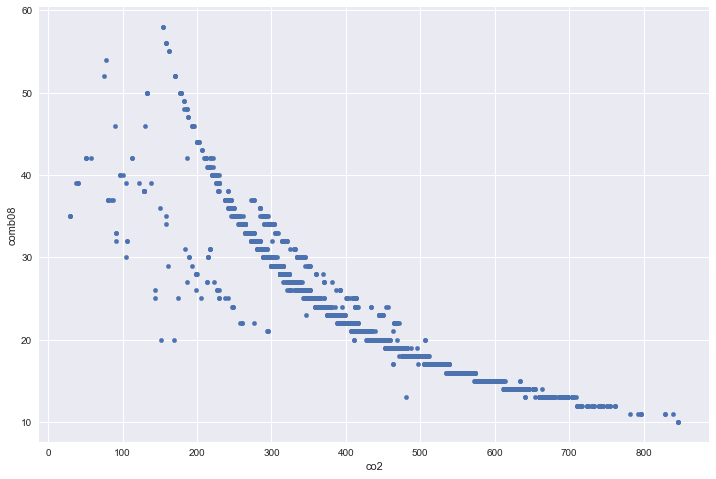

In [57]:
epa_subset.query("co2 > 0").plot.scatter(x='co2', y='comb08')

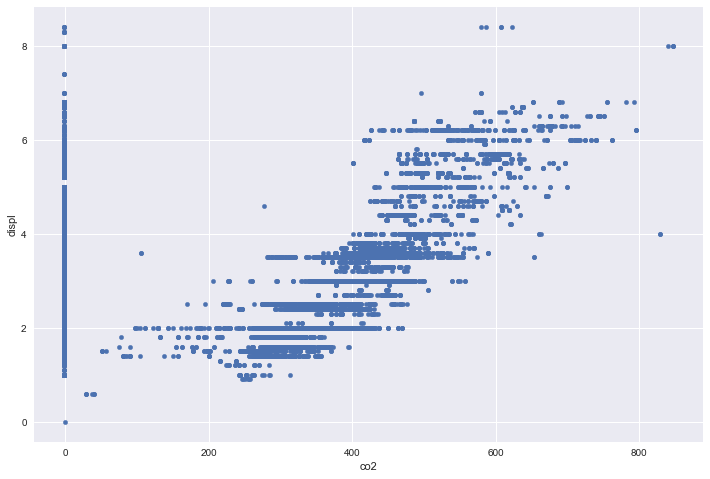

In [58]:
epa_subset.plot.scatter(x='co2', y='displ')

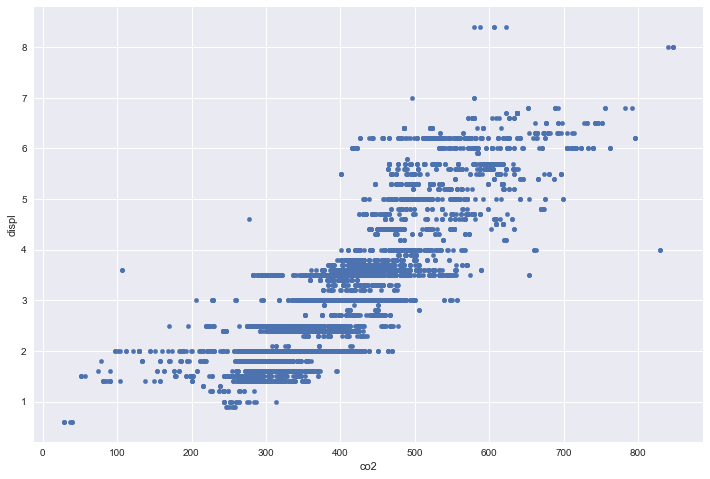

In [59]:
epa_nonzero_co2 = epa_subset.query("co2 > 0")
epa_nonzero_co2.plot.scatter(x='co2', y='displ')

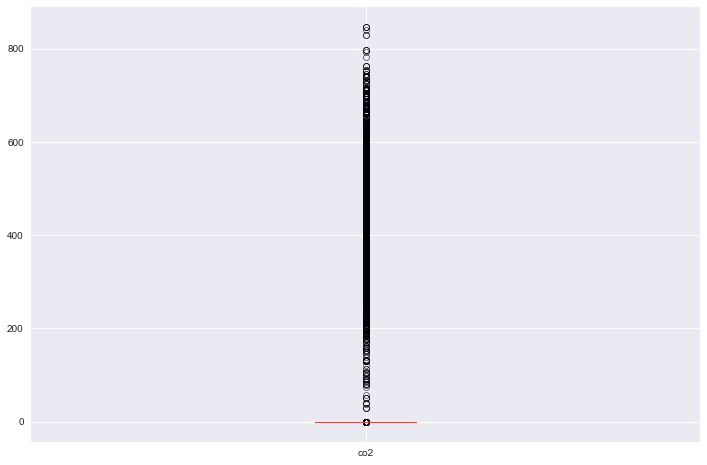

In [60]:
epa_subset.co2.plot(kind='box')

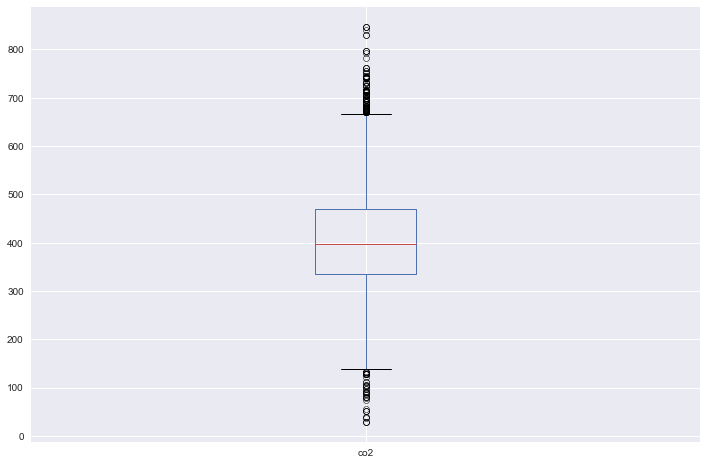

In [61]:
epa_nonzero_co2.co2.plot(kind='box')

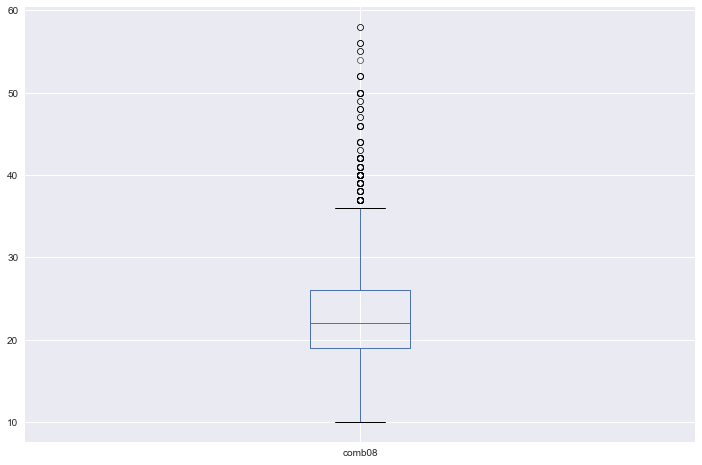

In [62]:
epa_nonzero_co2.comb08.plot(kind='box')

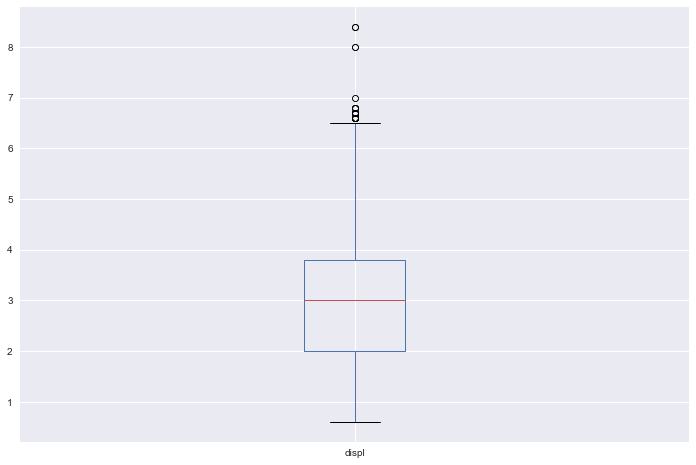

In [63]:
epa_nonzero_co2.displ.plot(kind='box')

In [64]:
q1 = epa_nonzero_co2.displ.quantile(0.25)
q3 = epa_nonzero_co2.displ.quantile(0.75)
displ_threshold = q3 + 1.5 * (q3 - q1)
display(q1, q3, displ_threshold)

2.0

3.8

6.5

In [65]:
epa_nonzero_co2[epa_nonzero_co2.displ > displ_threshold].describe()

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,highway08,highway08U,year
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,11.522388,11.605087,641.074627,641.074627,13.970149,13.960790,11.373134,6.901493,18.761194,18.605612,2015.358209
std,1.283440,1.129977,71.744140,71.744140,1.403137,1.388596,1.881616,0.537811,2.030745,2.053855,1.702952
min,8.000000,8.423200,496.000000,496.000000,10.000000,10.442400,8.000000,6.600000,13.000000,13.375000,2013.000000
25%,11.000000,11.485000,583.500000,583.500000,14.000000,13.863400,10.000000,6.600000,18.000000,18.300800,2014.000000
50%,11.000000,11.488900,637.000000,637.000000,14.000000,13.867000,12.000000,6.700000,19.000000,18.575800,2015.000000
75%,12.000000,12.355250,638.000000,638.000000,15.000000,15.169850,12.000000,6.800000,19.000000,19.216000,2017.000000
max,15.000000,14.818200,847.000000,847.000000,18.000000,17.875900,16.000000,8.400000,24.000000,23.904700,2018.000000


In [66]:
q1 = epa_nonzero_co2.co2.quantile(0.25)
q3 = epa_nonzero_co2.co2.quantile(0.75)
co2_threshold = q3 + 1.5 * (q3 - q1)
display(q1, q3, co2_threshold)

336.0

469.0

668.5

In [67]:
epa_nonzero_co2.query("co2 > @co2_threshold and displ > @displ_threshold").describe()

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,highway08,highway08U,year
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,9.750000,9.767342,768.416667,768.416667,11.583333,11.629575,11.333333,7.200000,15.416667,15.291650,2014.416667
std,1.215431,0.952109,67.413862,67.413862,1.240112,1.033993,3.550501,0.590839,1.831955,1.769460,1.621354
min,8.000000,8.423200,688.000000,688.000000,10.000000,10.442400,8.000000,6.800000,13.000000,13.375000,2013.000000
25%,8.750000,8.697475,691.000000,691.000000,10.750000,10.554675,8.000000,6.800000,14.000000,13.879800,2013.000000
50%,10.000000,10.273850,768.500000,768.500000,11.500000,11.575800,10.000000,6.800000,15.000000,14.769800,2014.000000
75%,11.000000,10.540200,841.750000,841.750000,13.000000,12.838500,16.000000,8.000000,17.250000,17.376225,2015.000000
max,11.000000,10.591800,847.000000,847.000000,13.000000,12.888900,16.000000,8.000000,18.000000,17.712900,2018.000000


In [68]:
epa_nonzero_co2.query("co2 > @co2_threshold and displ > @displ_threshold")

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,VClass,year
24884,8,8.4232,847,847.0,10,10.4424,16.0,8.0,Premium Gasoline,15,14.7698,Bugatti,Veyron,Two Seaters,2013
25448,11,10.5402,688,688.0,13,12.8889,8.0,6.8,Premium Gasoline,18,17.7129,Bentley,Mulsanne,Midsize Cars,2013
25508,10,10.4781,755,755.0,12,11.7769,10.0,6.8,Regular Gasoline,14,13.8798,Ford,E350 Van,"Vans, Cargo Type",2013
25513,10,10.0696,782,782.0,11,11.3747,10.0,6.8,Regular Gasoline,14,13.5158,Ford,E350 Wagon,"Vans, Passenger Type",2013
25947,8,8.4232,847,847.0,10,10.4424,16.0,8.0,Premium Gasoline,15,14.7698,Bugatti,Veyron,Two Seaters,2014
26707,11,10.5402,688,688.0,13,12.8889,8.0,6.8,Premium Gasoline,18,17.7129,Bentley,Mulsanne,Midsize Cars,2014
26771,10,9.9114,792,792.0,11,11.2187,10.0,6.8,Regular Gasoline,13,13.3750,Ford,E350 Wagon,"Vans, Passenger Type",2014
26853,10,10.4781,755,755.0,12,11.7769,10.0,6.8,Regular Gasoline,14,13.8798,Ford,E350 Van,"Vans, Cargo Type",2014
27342,11,10.5402,688,688.0,13,12.8889,8.0,6.8,Premium Gasoline,18,17.7129,Bentley,Mulsanne,Midsize Cars,2015
27392,8,8.4232,847,847.0,10,10.4424,16.0,8.0,Premium Gasoline,15,14.7698,Bugatti,Veyron,Two Seaters,2015


In [69]:
# pivot tables
epa_nonzero_comb = epa_subset.query("comb08 >= 0.01")
epa_nonzero_comb.pivot_table(index="year", aggfunc=pd.np.median)

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,highway08,highway08U
year,,,,,,,,,,
1984,18.0,0.00000,-1.0,467.736842,19.0,0.00000,4.0,2.60,22.0,0.00000
1985,17.0,0.00000,-1.0,467.736842,19.0,0.00000,4.0,2.50,22.0,0.00000
1986,17.0,0.00000,-1.0,467.736842,19.0,0.00000,4.0,2.50,23.0,0.00000
1987,17.0,0.00000,-1.0,467.736842,19.0,0.00000,4.0,2.50,22.0,0.00000
1988,17.0,0.00000,-1.0,467.736842,19.0,0.00000,5.5,2.60,22.0,0.00000
1989,16.0,0.00000,-1.0,467.736842,19.0,0.00000,6.0,2.70,22.0,0.00000
1990,16.0,0.00000,-1.0,493.722222,18.0,0.00000,6.0,2.80,22.0,0.00000
1991,16.0,0.00000,-1.0,493.722222,18.0,0.00000,6.0,3.00,22.0,0.00000
1992,16.0,0.00000,-1.0,493.722222,19.0,0.00000,6.0,3.00,22.0,0.00000


In [70]:
epa_nonzero_comb.pivot_table(index="year", 
                             values=["city08", "comb08", "highway08"], 
                             aggfunc=pd.np.median)

,city08,comb08,highway08
year,,,
1984,18.0,19.0,22.0
1985,17.0,19.0,22.0
1986,17.0,19.0,23.0
1987,17.0,19.0,22.0
1988,17.0,19.0,22.0
1989,16.0,19.0,22.0
1990,16.0,18.0,22.0
1991,16.0,18.0,22.0
1992,16.0,19.0,22.0


In [71]:
epa_nonzero_comb.pivot_table(index="year", 
                             columns="fuelType1",
                             values=["city08", "comb08", "highway08"], aggfunc=pd.np.median)

city08                                                             \
fuelType1 Diesel Electricity Midgrade Gasoline Natural Gas Premium Gasoline   
year                                                                          
1984        21.0         NaN               NaN         NaN              NaN   
1985        21.0         NaN               NaN         NaN             17.0   
1986        21.0         NaN               NaN         NaN             17.0   
1987        17.0         NaN               NaN         NaN             17.0   
1988        16.0         NaN               NaN         NaN             16.0   
1989        16.0         NaN               NaN         NaN             16.0   
1990        15.0         NaN               NaN         NaN             15.0   
1991        15.0         NaN               NaN         NaN             15.0   
1992        16.0         NaN               NaN         NaN             15.0   
1993        16.0         NaN               NaN        15.0             15.0   
1994        15.0         NaN               NaN        15.0             15.5   
1995        14.0         NaN               NaN        15.0             15.0   
1996        15.0         NaN               NaN        15.0             16.0   
1997        14.0         NaN               NaN        15.0             16.0   
1998        25.0        49.0               NaN        10.0             16.0   
1999        29.0        49.0               NaN        13.0             16.0   
2000        32.0        71.5               NaN        14.0             16.0   
2001        32.0        74.0               NaN        11.0             16.0   
2002        32.0        66.0               NaN        12.0             16.0   
2003        29.0        87.0               NaN        11.5             16.0   
2004        28.0         NaN               NaN        11.0             16.0   
2005        29.0         NaN               NaN         8.0             16.0   
2006        30.0         NaN               NaN        24.0             16.0   
2007        18.0         NaN               NaN        24.0             17.0   
2008        18.0       102.0               NaN        24.0             16.0   
2009        23.0         NaN               NaN        24.0             16.0   
2010        29.0         NaN               NaN        24.0             16.0   
2011        26.0       100.0              16.0        17.5             17.0   
2012        29.0        78.0              14.0        19.0             18.0   
2013        27.0       116.0              15.0        27.0             18.0   
2014        27.0       122.0              15.0        19.5             18.0   
2015        27.5       105.5              14.0        27.0             19.0   
2016        23.0        98.0              14.5         NaN             19.0   
2017        23.0       102.0              16.0         NaN             19.0   
2018        28.0       121.0              16.0         NaN             20.0   
2019         NaN         NaN              18.5         NaN             15.0   

                           comb08                                            \
fuelType1 Regular Gasoline Diesel Electricity Midgrade Gasoline Natural Gas   
year                                                                          
1984                  17.0   24.0         NaN               NaN         NaN   
1985                  17.0   23.0         NaN               NaN         NaN   
1986                  17.0   22.0         NaN               NaN         NaN   
1987                  17.0   18.0         NaN               NaN         NaN   
1988                  17.0   17.0         NaN               NaN         NaN   
1989                  17.0   17.0         NaN               NaN         NaN   
1990                  17.0   17.0         NaN               NaN         NaN   
1991                  17.0   17.0         NaN               NaN         NaN   
1992                  17.0   18.0         NaN              

In [72]:
epa_nonzero_comb.pivot_table(index=["year", "fuelType1"],
                             values=["city08", "comb08", "highway08"], 
                             aggfunc=pd.np.median)

city08  comb08  highway08
year fuelType1                                   
1984 Diesel               21.0    24.0       27.0
     Regular Gasoline     17.0    19.0       22.0
1985 Diesel               21.0    23.0       27.0
     Premium Gasoline     17.0    19.0       22.0
     Regular Gasoline     17.0    19.0       22.0
1986 Diesel               21.0    22.0       24.0
     Premium Gasoline     17.0    19.0       22.0
     Regular Gasoline     17.0    19.0       23.0
1987 Diesel               17.0    18.0       21.0
     Premium Gasoline     17.0    19.0       22.0
     Regular Gasoline     17.0    19.0       23.0
1988 Diesel               16.0    17.0       20.0
     Premium Gasoline     16.0    18.0       23.0
     Regular Gasoline     17.0    19.0       23.0
1989 Diesel               16.0    17.0       20.0
     Premium Gasoline     16.0    18.0       22.0
     Regular Gasoline     17.0    19.0       22.0
1990 Diesel               15.0    17.0       20.0
     Premium Gasoline     15.0    18.0       22.0
     Regular Gasoline     17.0    19.0       22.0
1991 Diesel               15.0    17.0       20.0
     Premium Gasoline     15.0    18.0       22.0
     Regular Gasoline     17.0    19.0       22.0
1992 Diesel               16.0    18.0       22.0
     Premium Gasoline     15.0    18.0       22.0
     Regular Gasoline     17.0    19.0       23.0
1993 Diesel               16.0    17.0       20.0
     Natural Gas          15.0    17.0       21.0
     Premium Gasoline     15.0    18.0       22.0
     Regular Gasoline     17.0    20.0       24.0
...                        ...     ...        ...
2014 Diesel               27.0    30.5       37.5
     Electricity         122.0   107.0       97.0
     Midgrade Gasoline    15.0    17.0       22.0
     Natural Gas          19.5    22.0       27.0
     Premium Gasoline     18.0    21.0       26.0
     Regular Gasoline     20.0    23.0       28.0
2015 Diesel               27.5    32.0       38.5
     Electricity         105.5   103.0       98.5
     Midgrade Gasoline    14.0    17.0       22.0
     Natural Gas          27.0    31.0       38.0
     Premium Gasoline     19.0    22.0       26.0
     Regular Gasoline     20.0    23.0       28.0
2016 Diesel               23.0    25.5       30.0
     Electricity          98.0   100.0       99.0
     Midgrade Gasoline    14.5    17.0       22.0
     Premium Gasoline     19.0    22.0       26.0
     Regular Gasoline     21.0    24.0       28.0
2017 Diesel               23.0    25.0       30.0
     Electricity         102.0   103.5      101.0
     Midgrade Gasoline    16.0    19.0       24.0
     Premium Gasoline     19.0    22.0       27.0
     Regular Gasoline     21.0    24.0       28.0
2018 Diesel               28.0    32.0       38.5
     Electricity         121.0   107.5      100.0
     Midgrade Gasoline    16.0    19.0       24.0
     Premium Gasoline     20.0    22.0       27.0
     Regular Gasoline     21.0    23.0       28.0
2019 Midgrade Gasoline    18.5    21.5       26.5
     Premium Gasoline     15.0    18.0       25.0
     Regular Gasoline     30.0    34.0       40.0

[153 rows x 3 columns]

In [73]:
(epa_nonzero_comb.pivot_table(index=["VClass"],
                             values=["city08", "highway08"], 
                             aggfunc=pd.np.median)
                 .sort_values(by="highway08"))

,city08,highway08
VClass,,
Standard Pickup Trucks/2wd,12.0,15.5
"Vans, Passenger Type",12.0,17.0
Vans Passenger,13.0,17.0
Vans,14.0,17.0
Standard Pickup Trucks,14.0,17.0
"Vans, Cargo Type",13.0,17.0
Standard Pickup Trucks 4WD,14.0,18.0
Special Purpose Vehicles/4wd,15.5,19.0
Special Purpose Vehicle 4WD,15.0,19.0


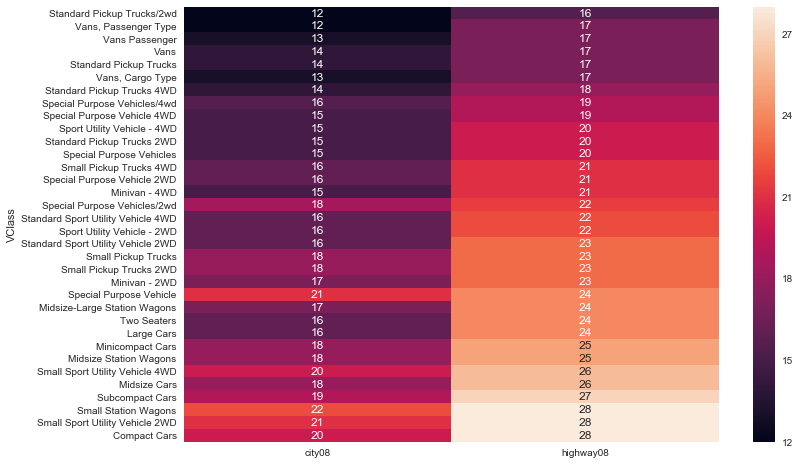

In [74]:
pivot = (epa_nonzero_comb.pivot_table(index=["VClass"],
                                      values=["city08", "highway08"], 
                                      aggfunc=pd.np.median)
                         .sort_values(by="highway08"))
sns.heatmap(pivot, annot=True)

In [76]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/output.sqlite')
epa_subset.to_sql("epa_subset", con=engine)
epa_sales = pd.read_sql_table("epa_sales", con=engine)

In [ ]:
epa_sales.head()

In [ ]:
epa_sales.describe()

In [ ]:
epa_sales.plot.scatter(x="comb08", y="quantity")

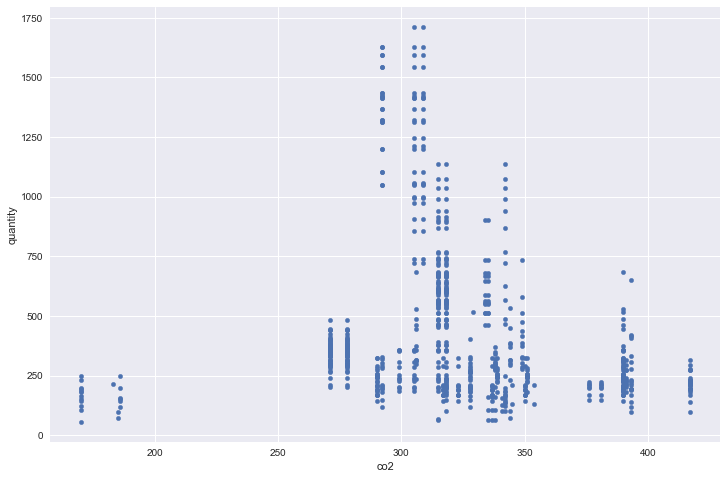

In [320]:
epa_sales.query("co2 > 0.01").plot.scatter(x="co2", y="quantity")

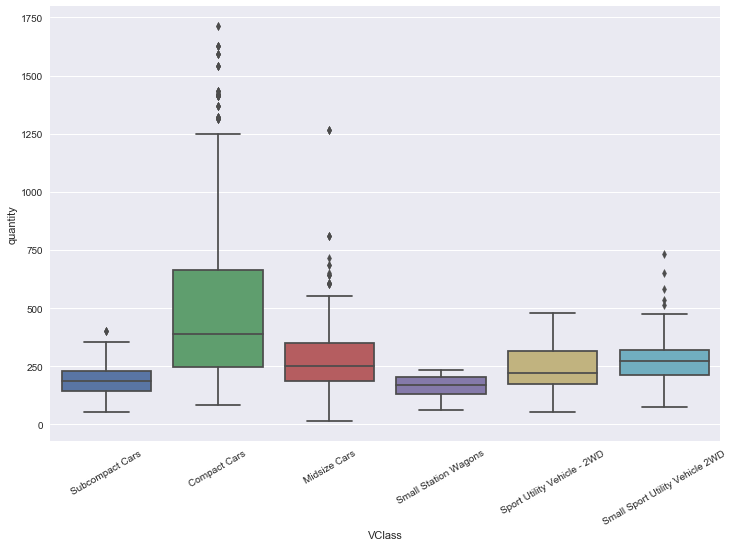

In [328]:
b = sns.boxplot(x="VClass", y="quantity", data=epa_sales)
for item in b.get_xticklabels():
    item.set_rotation(30)

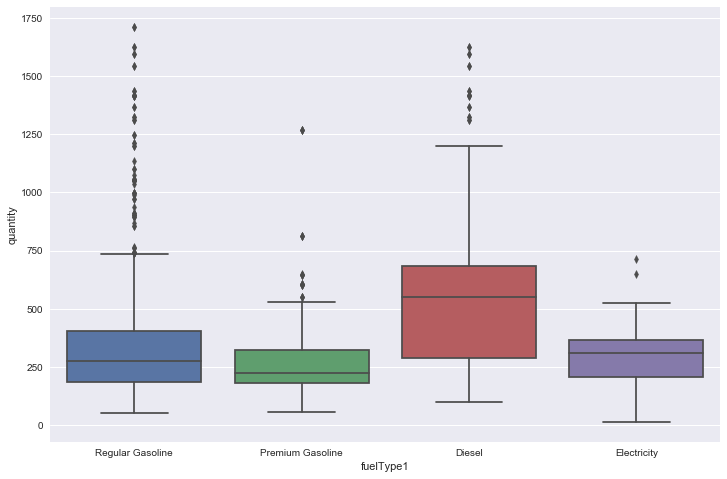

In [313]:
sns.boxplot(x="fueb = sns.boxplot(x="VClass", y="quantity", data=epa_sales)
for item in b.get_xticklabels():
    item.set_rotation(30)lType1", y="quantity", data=epa_sales)

In [327]:
epa_sales.pivot_table(index="year", values="quantity", columns="fuelType1", aggfunc=pd.np.sum).fillna(0)

fuelType1,Diesel,Electricity,Premium Gasoline,Regular Gasoline
year,,,,
2007,0.0,0.0,32223.0,20648.0
2008,0.0,0.0,25690.0,16541.0
2009,0.0,0.0,10265.0,8554.0
2010,16969.0,0.0,9987.0,21034.0
2011,14740.0,13.0,7059.0,18286.0
2012,16774.0,2298.0,12869.0,29638.0
2013,19090.0,4604.0,13448.0,30922.0
2014,21817.0,4781.0,7139.0,30911.0
2015,41966.0,3189.0,6101.0,51544.0


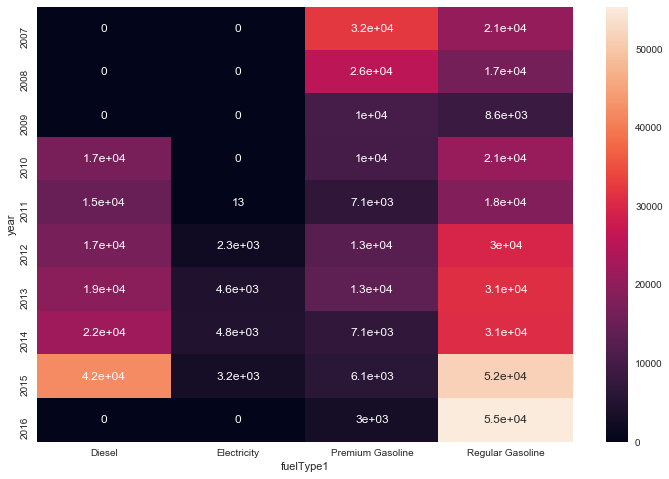

In [334]:
pivot_sales = epa_sales.pivot_table(index="year", values="quantity", columns="fuelType1", aggfunc=pd.np.sum).fillna(0)
sns.heatmap(pivot_sales.query("year < 2017"), annot=True)